2.25

介绍两个非常好用的md分析的工具：
- sequence logo plot 用于找多序列的保守型和一致性区域
- DCCM (Dynamic Cross-Correlation Matrix) 动态互相关用于关键残基的识别、配体结合、突变效应和长距离相互作用等过程

## DCCM

针对N个氨基酸，一共跑了T帧的轨迹，并将轨迹对其来出去平移旋转，希望定义c(i,j)表示残基i和残基j之间协方差，其中每个氨基酸都用CA原子的3D坐标表示:

1. 定义$<R_i>$表示氨基酸i位置的系综平均
2. 定义第i个氨基酸在第t时刻相对于系综平均位置的位移向量，$\Delta R_{i,t} = R_{i,t} - <R_{i}> = (x_{i,t},y_{i,t},z_{i,t})$
3. 计算第t个时刻i、j两个氨基酸之间的协方差(平移向量内积) $c_{i,j,t} = \Delta R_{i,t} \Delta R_{j,t}$
4. 平均每一帧得到系综平均的i、j残基的协方差 $c_{i,j}$
5. 归一化得到i、j残基的相关系数 $C(i,j)=\frac{c(i,j)}{[c(i,i) c(j,j)]^{\frac{1}{2}}}$

## Sequence Logo
主要利用biotite + matplotlib实现代码

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import biotite.sequence as seq
import biotite.sequence.io.fasta as fasta
import biotite.sequence.io.genbank as gb
import biotite.sequence.graphics as graphics
import biotite.application.clustalo as clustalo
import biotite.sequence.align as align


In [9]:
binding_sites = [
"VREIGEAVGLASSSTVHGHLA",
"IREIGDEFGITAKGAYDHLK",
"RAEIAQRLGFRSPNAAEEHLK",
"FDEMKEALDLASKSGIHRLIT",
"VREIGNHFDISSTNGVRSILA",
"VREICTAVGLRSTSTVHSHLN",
"IREIGDAVGLTSTSSVAHQLR",
"RAEIAQQLGFRSPNAAEEHLK",
"VREIGEAVGLASSSTVHGHLA",
"FREIGNAAGLKSPSSVKHQLQ",
"VREICSAVGLSSTSTVHGHIS",
"IREIGDQFGITAKGAYDHLK",
"RAEIAQRLGFRSPNAAEEHLK",
"FDEMKEALDLRSKSGIHRLVM",
"RVEIAREIGFKSPNAAEEHLK",
"FDEMKDALGLKSKSGIHRLIT",
"MREIGDAVGLASLSSVTHQLN",
"VREIGEAVGLASSFTVHGHLS",
"RAEIAAELGFRSANAAEEHLR",
"RAEIAQRLGFRSPNAAEEHLK",
]
sources = [
"L. welshimeri",
"L. interrogans",
"S. enterica",
"B. melitensis",
"F. succinogenes",
"C. difficile",
"M. avium",
"P. carotovorum",
"L. monocytogenes",
"S. enterica",
"B. longum",
"S. enterica",
"S. enterica",
"S. enterica",
"S. enterica",
"L. reuteri",
"L. biflexa",
"L. biflexa",
"E. coli",
"B. indica",
]
binding_sites = [seq.ProteinSequence(i) for i in binding_sites]

In [ ]:
alignment, order, guide_tree, distance_matrix = align.align_multiple(
    binding_sites,
    matrix=align.SubstitutionMatrix.std_protein_matrix(),
    gap_penalty=-5,
    terminal_penalty=False
)
print(alignment)

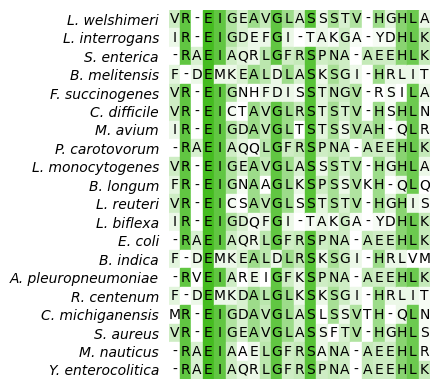

In [27]:
fig = plt.figure(figsize=(4.5, 4.0))
ax = fig.add_subplot(111)
graphics.plot_alignment_similarity_based(
    ax, alignment[:,:20], labels=sources[:20], symbols_per_line=len(alignment)
)
# Source names in italic
ax.set_yticklabels(ax.get_yticklabels(), fontdict={"fontstyle":"italic"})
fig.tight_layout()

Consensus sequence:
AAAAAAAAAAAAAAAAAA


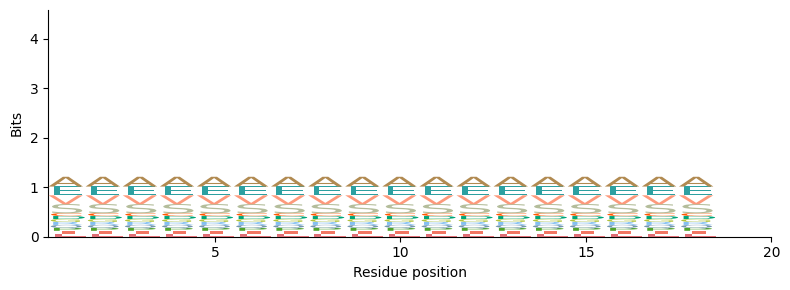

In [45]:
profile = seq.SequenceProfile.from_alignment(alignment)

print("Consensus sequence:")
print(profile.to_consensus())

fig = plt.figure(figsize=(8.0, 3.0))
ax = fig.add_subplot(111)
graphics.plot_sequence_logo(ax, profile, scheme="flower")
ax.set_xticks([5,10,15,20])
ax.set_xlabel("Residue position")
ax.set_ylabel("Bits")
# Only show left and bottom spine
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
fig.tight_layout()
# sphinx_gallery_thumbnail_number = 2

plt.show()

手动align来指定序列比对,或者手动创建一个MSA